In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("netflix_movies.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [4]:
df.nunique()


show_id         8807
type               2
title           8804
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [6]:
##### Handling the Null Value ######
df["director"].fillna("Unknown", inplace=True)
df["cast"].fillna("Unknown", inplace=True)
df["country"].fillna(df["country"].mode()[0], inplace=True)
df["date_added"].fillna(df["date_added"].mode()[0], inplace=True)
df["rating"].fillna(df["rating"].mode()[0], inplace=True)
df["duration"].fillna(df["duration"].mode()[0], inplace=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13052\188726617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["director"].fillna("Unknown", inplace=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13052\188726617.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [7]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [9]:
# Release year range
# get the first index of the column
starting_year = df["release_year"].min()

# get the last index of the column
final_year = df["release_year"].max()

print(f"This dataset covers movies released from {starting_year} to {final_year}.")

This dataset covers movies released from 1925 to 2021.


In [10]:
release_year = df["release_year"].value_counts().reset_index()
release_year

,release_year,count
0,2018,1147
1,2017,1032
2,2019,1030
3,2020,953
4,2016,902
...,...,...
69,1961,1
70,1925,1
71,1959,1
72,1966,1


In [11]:
type_counts = df["type"].value_counts().reset_index()
type_counts

,type,count
0,Movie,6131
1,TV Show,2676


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

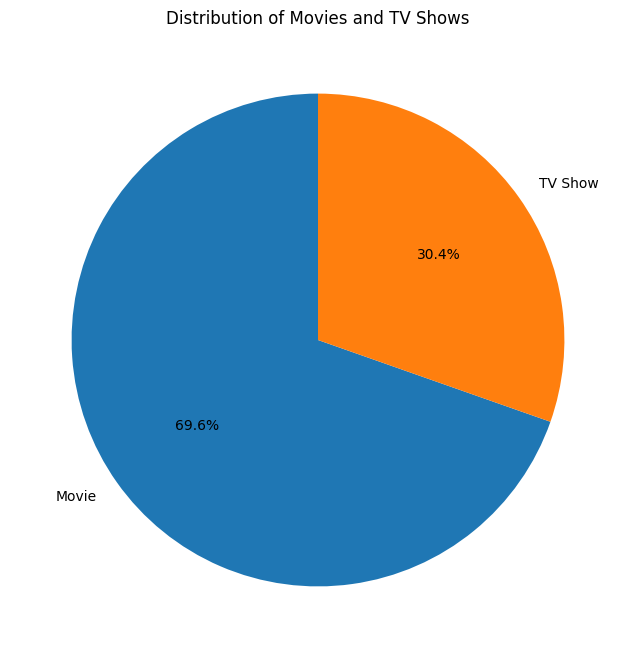

In [13]:
#### Pie chart of movies vs TV shows
type_counts = df['type'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Movies and TV Shows')
plt.show()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13052\2944152784.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette=['#1f77b4', '#ff7f0e'])


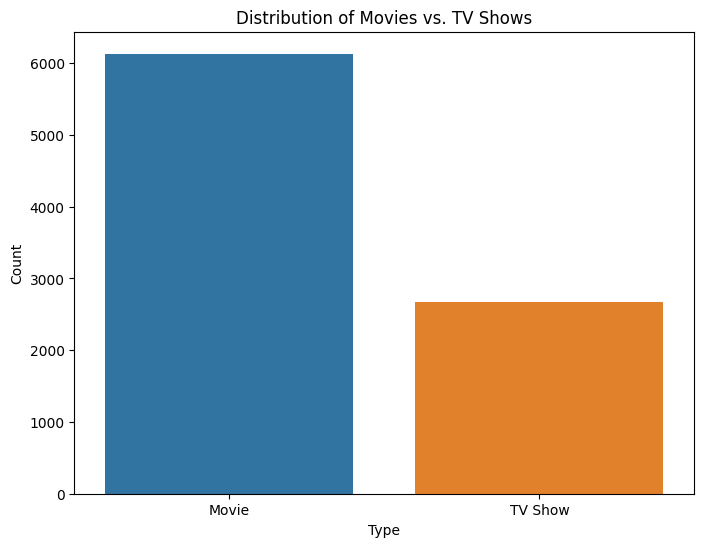

In [14]:
# Count of movies vs. TV shows
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df, palette=['#1f77b4', '#ff7f0e'])
plt.title('Distribution of Movies vs. TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

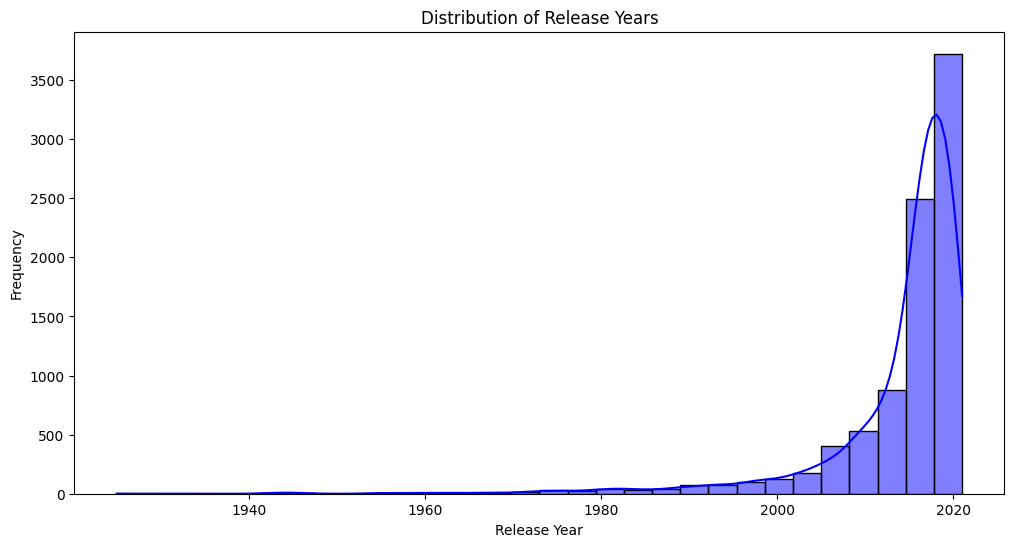

In [15]:
# Distribution of release years
plt.figure(figsize=(12, 6))
sns.histplot(df['release_year'], bins=30, kde=True, color='blue')
plt.title('Distribution of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

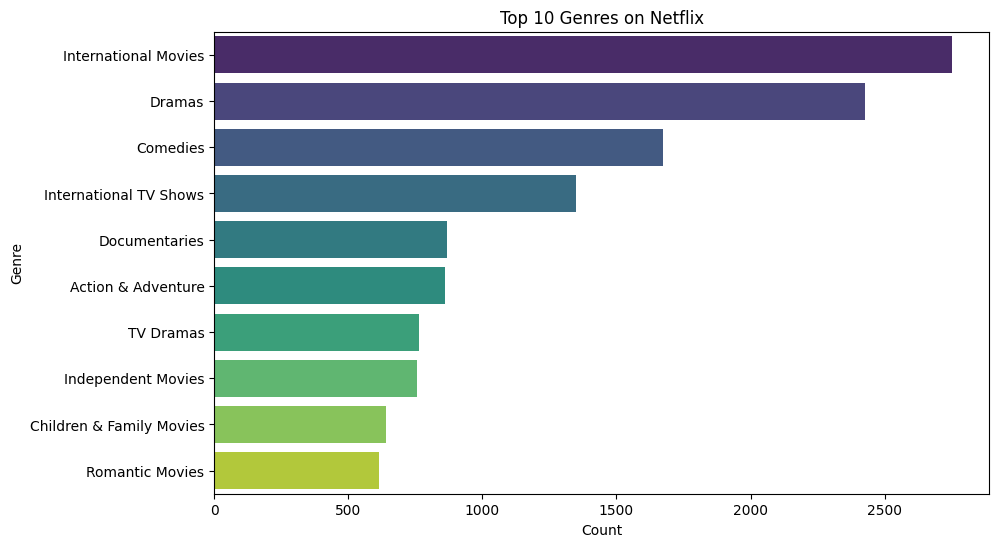

In [16]:
from collections import Counter

# Split genres and count their occurrences
genres = df['listed_in'].str.split(', ').explode()
genre_counts = Counter(genres)

# Top 10 genres
top_genres = pd.DataFrame(genre_counts.most_common(10), columns=['Genre', 'Count'])

# Plot top genres
plt.figure(figsize=(10, 6))
sns.barplot(x='Count', y='Genre', data=top_genres, hue='Genre', palette='viridis', legend=False)
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

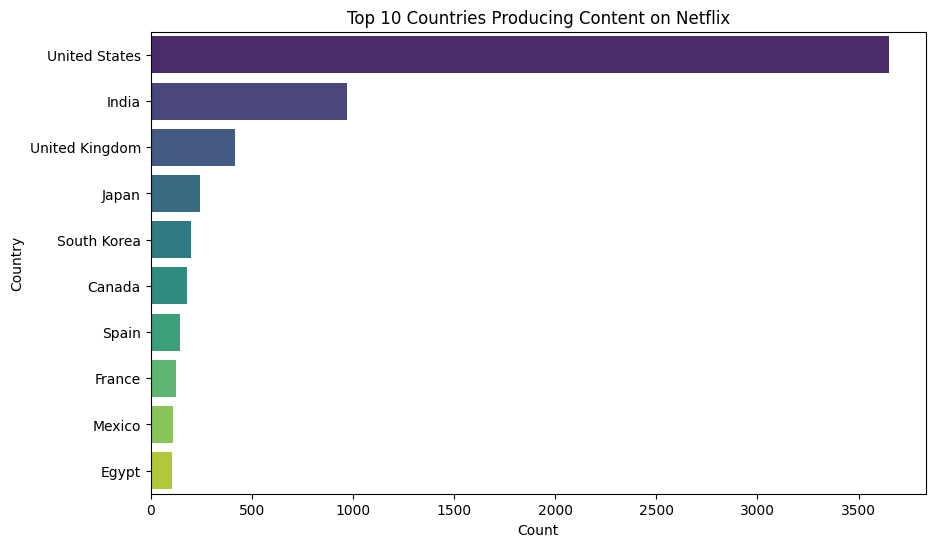

In [17]:
# Top 10 countries
top_countries = df['country'].value_counts().head(10)

# Plot top countries
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, hue=top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries Producing Content on Netflix')
plt.xlabel('Count')
plt.ylabel('Country')
plt.show()

In [18]:
# Calculate the top 10 directors based on the number of titles
top_directors = df['director'].value_counts()
top_directors = top_directors[top_directors > 1]
top_directors.drop('Unknown', inplace=True, errors='ignore')
top_directors = top_directors.head(10)
top_directors

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

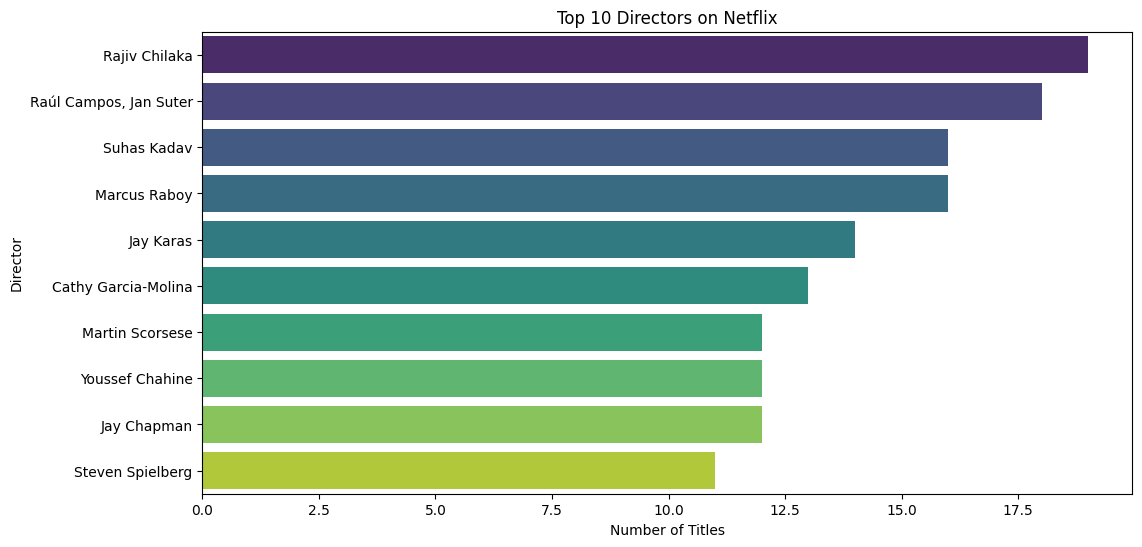

In [19]:
plt.figure(figsize=(12, 6))  # Adjust the size of the plot
sns.barplot(x=top_directors.values, y=top_directors.index, hue = top_directors.index,palette='viridis',legend=False)

plt.title('Top 10 Directors on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()



In [20]:
### Top 10 Cast Members ###
top_cast = df['cast'].str.split(', ').explode().value_counts().head(10)
top_cast = top_cast.drop('Unknown')
top_cast

cast
Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
Rupa Bhimani        31
Om Puri             30
Akshay Kumar        30
Yuki Kaji           29
Name: count, dtype: int64

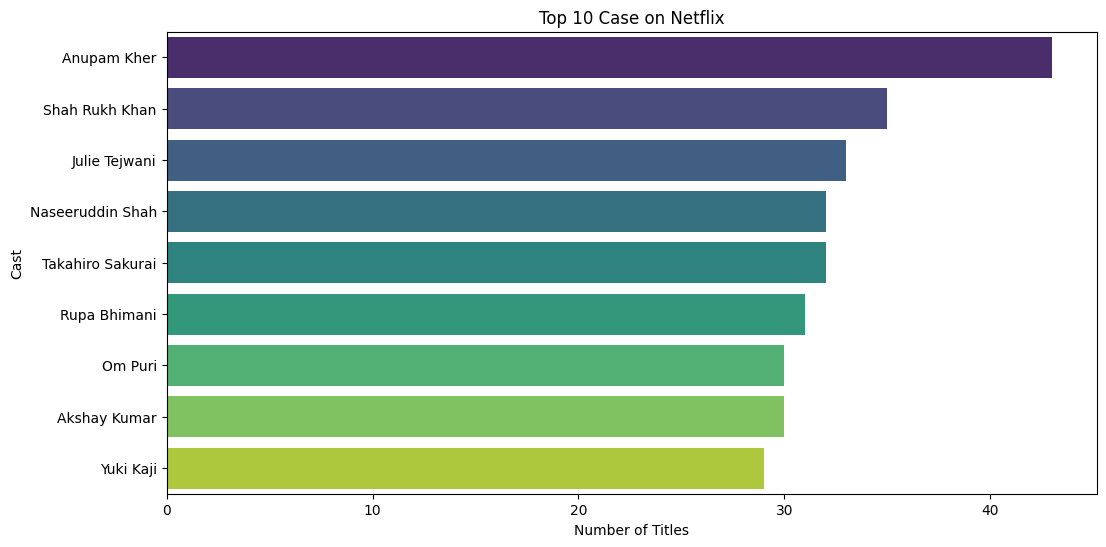

In [21]:
### Bar Plot for the same ###
plt.figure(figsize=(12, 6))
sns.barplot(x=top_cast.values, y=top_cast.index, hue = top_cast.index,palette='viridis',legend=False)

plt.title('Top 10 Case on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Cast')
plt.show()


In [22]:
### Top 10 Countries with Most Movies/TV Shows ###
top_countries = df['country'].value_counts().head(10)
top_countries


country
United States     3649
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64

In [23]:
top_countries_df = top_countries.reset_index()
top_countries_df.columns = ['Country', 'Count']

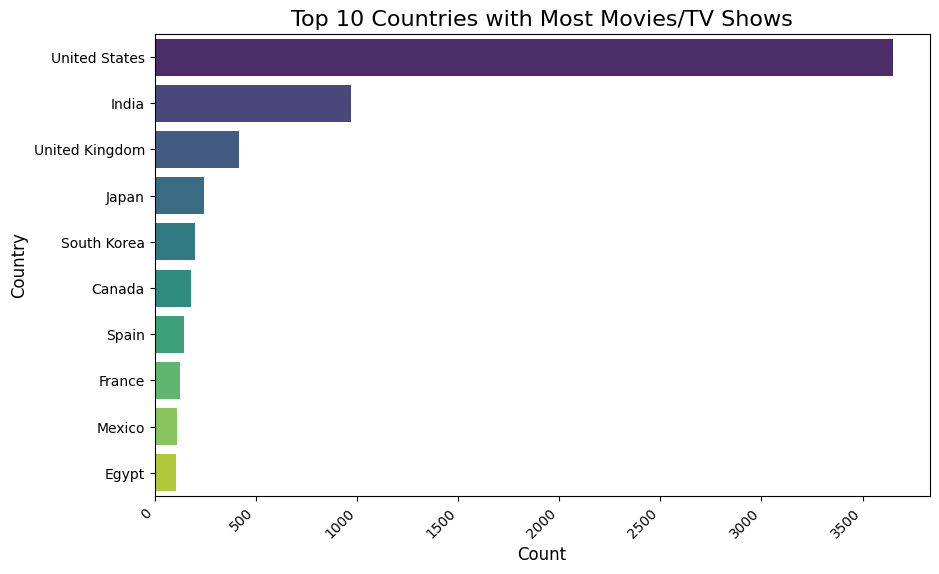

In [24]:
####### Plot for Top 10 Countries with Most Movies/TV Shows ##########
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index,  hue=top_countries.index, palette='viridis', legend=False)
plt.title('Top 10 Countries with Most Movies/TV Shows', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [25]:
pip install squarify

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


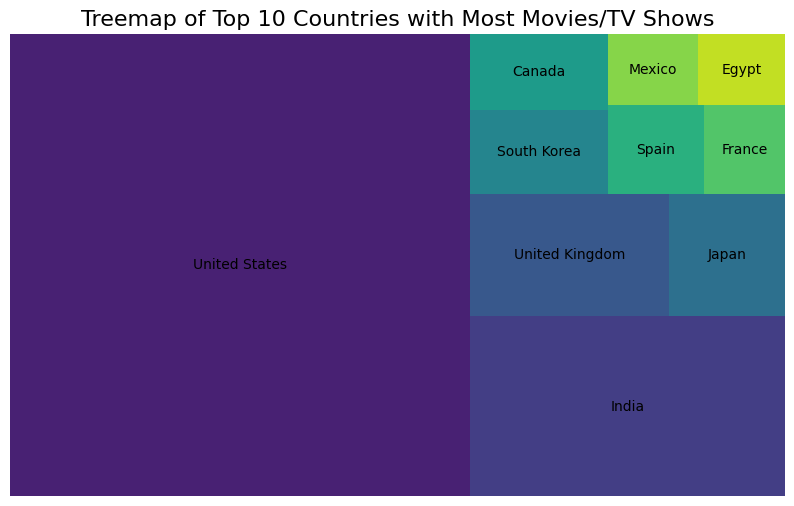

In [26]:
import squarify
plt.figure(figsize=(10, 6))
squarify.plot(sizes=top_countries_df['Count'], label=top_countries_df['Country'], color=sns.color_palette('viridis', len(top_countries_df)))
plt.title('Treemap of Top 10 Countries with Most Movies/TV Shows', fontsize=16)
plt.axis('off')
plt.show()

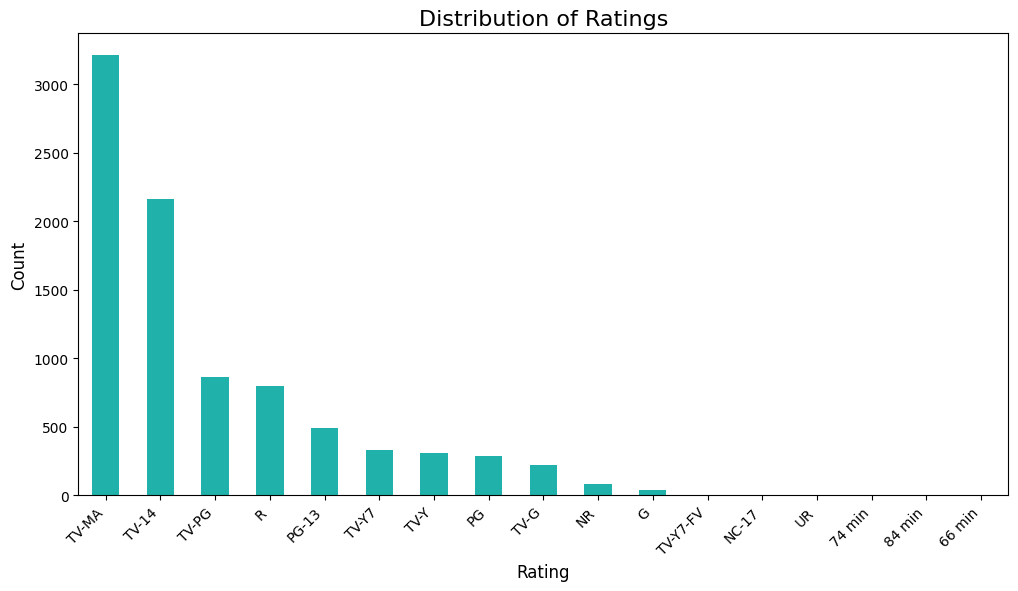

In [27]:
# 5. **Distribution of Ratings**
plt.figure(figsize=(12, 6))
df['rating'].value_counts().plot(kind='bar', color='lightseagreen')
plt.title('Distribution of Ratings', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()

In [28]:
# 8. **Most Popular Genres (from listed_in)**
genres = df['listed_in'].str.split(',', expand=True).stack()
top_genres = genres.value_counts().head(10)

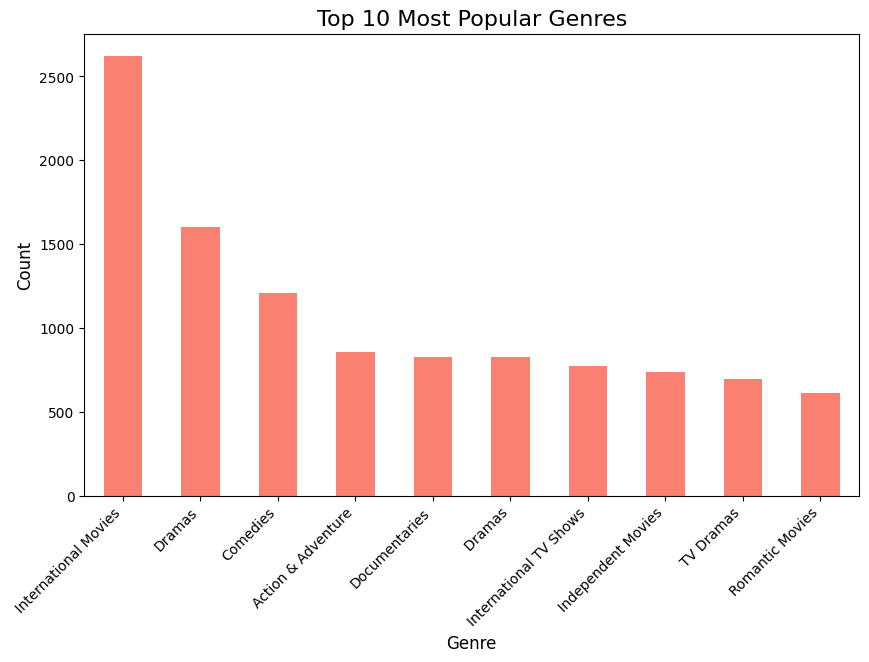

In [29]:
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', color='salmon')
plt.title('Top 10 Most Popular Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()